<a href="https://colab.research.google.com/github/unaexoo/Study/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
import random
import sys

In [ ]:
iris = load_iris()
iris_data  = iris.data
df = pd.DataFrame(iris_data, columns = iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
def Clustering(cluster_count, data):
    x = deepcopy(data)
    U = np.zeros((len(data), cluster_count))
    v = np.zeros((cluster_count, x.shape[1]))
    v_cnt = len(data)

    for i in range(len(data)):
        U[i, i % cluster_count] = 1

    for i in range(cluster_count):
        sumx = np.zeros(x.shape[1])
        cnt = 0
        for j in range(len(data)):
            if U[j, i] == 1:
                sumx += x[j]
                cnt += 1
        if cnt > 0:
            v[i] = sumx / cnt

    while v_cnt != 0:
        U = np.zeros((len(data), cluster_count))
        v_cnt = 0
        d = np.zeros((len(data), cluster_count))
        v_old = deepcopy(v)

        for i in range(len(data)):
            mins = sys.maxsize
            cnt = 0
            for j in range(cluster_count):
                d[i, j] = euclidean_dist(v[j], x[i])
                if d[i, j] < mins:
                    mins = d[i, j]
                    cnt = j
            U[i, cnt] = 1

        for i in range(cluster_count):
            sumx = np.zeros(x.shape[1])
            cnt = 0
            for k in range(len(data)):
                if U[k, i] == 1:
                    sumx += x[k]
                    cnt += 1
            if cnt > 0:
                v[i] = sumx / cnt

        for i in range(cluster_count):
            if not np.array_equal(v_old[i], v[i]):
                v_cnt += 1

    return U, v

def euclidean_dist(x, y):
    return np.sqrt(np.sum((np.array(x) - np.array(y)) ** 2))

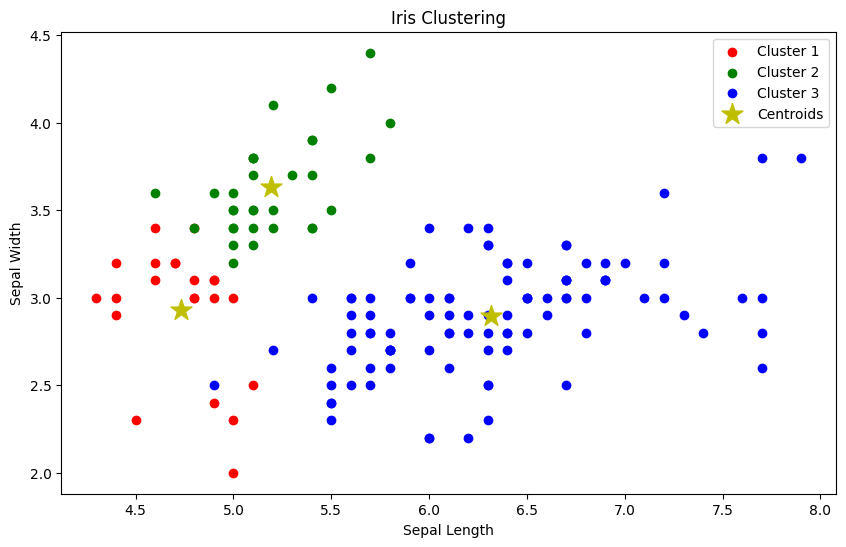

In [ ]:
cluster_assignments, cluster_centers = Clustering(3, iris_data)

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b']
for i in range(3):  # 3개의 클러스터
    cluster_data = iris_data[np.where(cluster_assignments[:, i] == 1)]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {i+1}')

# 클러스터 중심을 별표로 표시
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='y', marker='*', s=250, label='Centroids')

plt.title('Iris Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
